## ML - EXP - 4

Atharva Prashant Pawar (9427) - [ Batch - D ]

# Q1. Draw Decision Tree for below problem

In [2]:
# Let's assume we want to play badminton on a particular day
# — say Saturday — how will you decide whether to play or not

In [3]:
'''
Dataset:

day ,weather ,temperature ,humidity ,wind ,play

1, Sunny, hot, high, weak, NO
2, Cloudy, hot, high, weak, yes
3, Sunny, mild, normal, strong, yes
4, Cloudy, mild, high, strong, yes
5, rainy, mild, high, strong, NO
6, rainy, cool, normal, strong, NO
7, rainy, mild, high, weak, yes
8, sunny, hot, high, strong, no
9, cloudy, hot, normal, weak, yes
10, rainy, mild, high, strong, no


'''

'\nDataset:\n\nday ,weather ,temperature ,humidity ,wind ,play\n\n1, Sunny, hot, high, weak, NO\n2, Cloudy, hot, high, weak, yes\n3, Sunny, mild, normal, strong, yes\n4, Cloudy, mild, high, strong, yes\n5, rainy, mild, high, strong, NO\n6, rainy, cool, normal, strong, NO\n7, rainy, mild, high, weak, yes\n8, sunny, hot, high, strong, no\n9, cloudy, hot, normal, weak, yes\n10, rainy, mild, high, strong, no\n\n\n'

In [4]:
import csv

data = [
    [1, 'Sunny', 'hot', 'high', 'weak', 'NO'],
    [2, 'Cloudy', 'hot', 'high', 'weak', 'yes'],
    [3, 'Sunny', 'mild', 'normal', 'strong', 'yes'],
    [4, 'Cloudy', 'mild', 'high', 'strong', 'yes'],
    [5, 'rainy', 'mild', 'high', 'strong', 'NO'],
    [6, 'rainy', 'cool', 'normal', 'strong', 'NO'],
    [7, 'rainy', 'mild', 'high', 'weak', 'yes'],
    [8, 'sunny', 'hot', 'high', 'strong', 'no'],
    [9, 'cloudy', 'hot', 'normal', 'weak', 'yes'],
    [10, 'rainy', 'mild', 'high', 'strong', 'no']
]

with open('dataset.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['day', 'weather', 'temperature', 'humidity', 'wind', 'play'])
    csvwriter.writerows(data)

In [5]:
import pandas as pd
df = pd.read_csv('dataset.csv')
print(df)

   day weather temperature humidity    wind play
0    1   Sunny         hot     high    weak   NO
1    2  Cloudy         hot     high    weak  yes
2    3   Sunny        mild   normal  strong  yes
3    4  Cloudy        mild     high  strong  yes
4    5   rainy        mild     high  strong   NO
5    6   rainy        cool   normal  strong   NO
6    7   rainy        mild     high    weak  yes
7    8   sunny         hot     high  strong   no
8    9  cloudy         hot   normal    weak  yes
9   10   rainy        mild     high  strong   no


In [6]:
# Define notations for label encoding
notations = {
    'weather': {'Sunny': 1, 'Cloudy': 2, 'rainy': 3, 'sunny': 4, 'cloudy': 5},
    'temperature': {'hot': 1, 'mild': 2, 'cool': 3},
    'humidity': {'high': 1, 'normal': 2},
    'wind': {'weak': 1, 'strong': 2},
    'play': {'NO': 0, 'yes': 1, 'no': 0}
}

# label encoding using notations
df.replace(notations, inplace=True)
print(df)

   day  weather  temperature  humidity  wind  play
0    1        1            1         1     1     0
1    2        2            1         1     1     1
2    3        1            2         2     2     1
3    4        2            2         1     2     1
4    5        3            2         1     2     0
5    6        3            3         2     2     0
6    7        3            2         1     1     1
7    8        4            1         1     2     0
8    9        5            1         2     1     1
9   10        3            2         1     2     0


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# columns = ['day', 'weather', 'temperature', 'humidity', 'wind', 'play']

X = df.drop('play', axis=1)
X = df.drop('day', axis=1)
y = df['play']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train.values, y_train)

y_pred = clf.predict(X_test.values)

accuracy = (accuracy_score(y_test.values, y_pred) * 100)
print("Accuracy:", accuracy)

Accuracy: 100.0


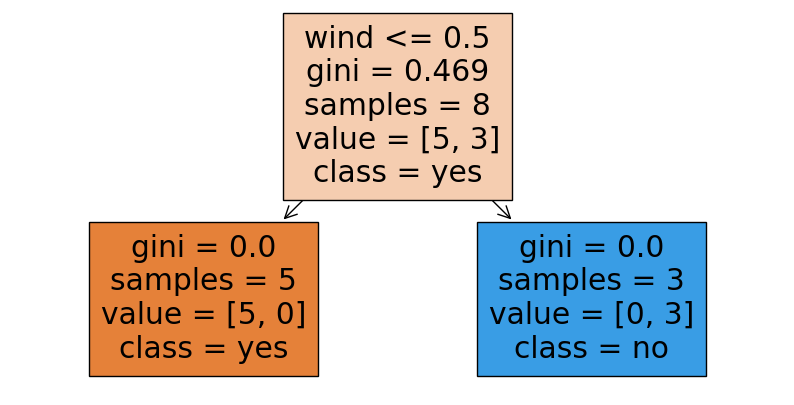

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

columns = ['day', 'weather', 'temperature', 'humidity', 'wind', 'play']
_target_names = ['yes','no']

# Plot the decision tree
plt.figure(figsize=(10, 5))
plot_tree(clf, filled=True, feature_names=columns, class_names=_target_names)
plt.show()

    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5,Saturday': 6, 'Sunday': 7

In [9]:
# Function to predict based on input features
def predict_play(features):
    prediction = clf.predict([features])
    if prediction == 1:
        return 'yes'
    else:
        return 'no'

# Input your feature values as a list
input_features = [6, 1, 2, 1, 2]

# Get the prediction
result = predict_play(input_features)
# print("Predicted outcome:", result)
print("Can we play on Saturday ?  \tAns:", result)

Can we play on Saturday ?  	Ans: yes


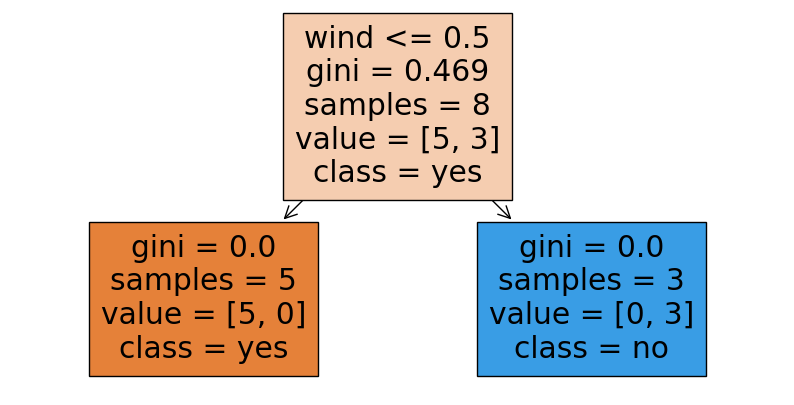

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

columns = ['day', 'weather', 'temperature', 'humidity', 'wind', 'play']
_target_names = ['yes','no']

# Plot the decision tree
plt.figure(figsize=(10, 5))
plot_tree(clf, filled=True, feature_names=columns, class_names=_target_names)
plt.show()

# Scaler Approch:

In [11]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = clf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy:", accuracy)

Accuracy: 100.0


# Q2. Draw Decision Tree for below problem

In [12]:
'''
If tenders are to be submitted the company will incur additional costs. These costs will have to be entirely recouped from the contract price. The risk, of course, is that if a tender is unsuccessful the company will have made a loss.

The cost of tendering for contract MS1 only is £50,000. The component supply cost if the tender is successful would be £18,000.

The cost of tendering for contract MS2 only is £14,000. The component supply cost if the tender is successful would be £12,000.

The cost of tendering for both contract MS1 and contract MS2 is £55,000. The component supply cost if the tender is successful would be £24,000.

For each contract, possible tender prices have been determined. In addition, subjective assessments have been made of the probability of getting the contract with a particular tender price as shown below. Note here that the company can only submit one tender and cannot, for example, submit two tenders (at different prices) for the same contract.

Option        Possible     Probability
              tender       of getting
              prices (£)   contract
MS1 only      130,000      0.20
              115,000      0.85
MS2 only      70,000       0.15
              65,000       0.80
              60,000       0.95
MS1 and MS2   190,000      0.05
              140,000      0.65
'''

'\nIf tenders are to be submitted the company will incur additional costs. These costs will have to be entirely recouped from the contract price. The risk, of course, is that if a tender is unsuccessful the company will have made a loss.\n\nThe cost of tendering for contract MS1 only is £50,000. The component supply cost if the tender is successful would be £18,000.\n\nThe cost of tendering for contract MS2 only is £14,000. The component supply cost if the tender is successful would be £12,000.\n\nThe cost of tendering for both contract MS1 and contract MS2 is £55,000. The component supply cost if the tender is successful would be £24,000.\n\nFor each contract, possible tender prices have been determined. In addition, subjective assessments have been made of the probability of getting the contract with a particular tender price as shown below. Note here that the company can only submit one tender and cannot, for example, submit two tenders (at different prices) for the same contract.\n

In [17]:
!pip install graphviz

Model Accuracy: 100.0


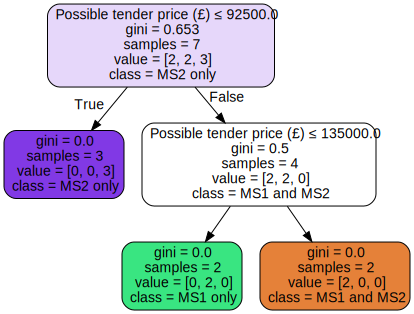

In [20]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score

# dataset
X = [
    [130000, 0.20],
    [115000, 0.85],
    [70000, 0.15],
    [65000, 0.80],
    [60000, 0.95],
    [190000, 0.05],
    [140000, 0.65]
]

# labeling
y = ['MS1 only', 'MS1 only', 'MS2 only', 'MS2 only', 'MS2 only', 'MS1 and MS2', 'MS1 and MS2']

# Createing decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Display the decision tree
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=['Possible tender price (£)', 'Probability of getting contract'],
                           class_names=clf.classes_,
                           filled=True, rounded=True,
                           special_characters=True)

# Calculate model accuracy
y_pred = clf.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Model Accuracy:", accuracy * 100)

graph = graphviz.Source(dot_data)
graph

# Approch 2:

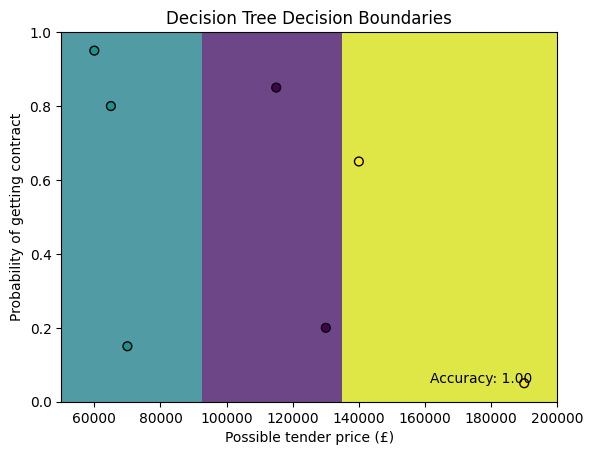

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Convert the labels to numeric values
label_mapping = {label: index for index, label in enumerate(set(y))}
y_numeric = [label_mapping[label] for label in y]

# Train the classifier
clf = DecisionTreeClassifier()
clf.fit(X, y_numeric)

# Create a meshgrid for visualization
xx, yy = np.meshgrid(np.linspace(50000, 200000, 500),
                     np.linspace(0, 1, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(np.array(X)[:, 0], np.array(X)[:, 1], c=y_numeric, s=40, edgecolor='k')
plt.xlabel('Possible tender price (£)')
plt.ylabel('Probability of getting contract')
plt.title('Decision Tree Decision Boundaries')

# Calculate model accuracy
y_pred = clf.predict(X)
accuracy = accuracy_score(y_numeric, y_pred)
plt.text(0.95, 0.05, f'Accuracy: {accuracy:.2f}', transform=plt.gca().transAxes, ha='right')

plt.show()
